In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import requests

from notebook_utils import configure_path, setup_matplotlib

In [2]:
configure_path()
setup_matplotlib()

# The Venezuelan Crisis

Once among Latin America's richest nations, Venezuela has taken a drastic turn during the last decade, facing significant challenges due to political unrest, economic decline, and shortages of vital resources including food, medicine, and electricity.

Venezuela is considered an example of a petrostate. The country holds the largest proven conventional oil reserves globally, and the state-owned company, Petroleos de Venezuela S.A. (PDVSA), has monopolized oil extraction since President Carlos Andres Perez nationalized this resource in 1976. The government’s income has been deeply reliant on oil and natural gas exports, financing over 60% of its budget on oil exports.

Without delving into the causes, Venezuela’s downfall can be tied to the collapse of its oil exports, with a cascading domino effect manifesting across macroeconomic indicators and affecting the population at large. Utilizing data sourced from the International Monetary Fund (IMF) and the Organization for Economic Cooperation and Development (OECD), we analyze key indicators to depict the crisis.


## Oil Production (OECD)

Crude oil production dataset retrieved from [OECD's indicators website](https://www.oecd.org/en/data/indicators/crude-oil-production.html)

In [3]:
oil = pd.read_csv("data/external/01-a-crude_oil_production.csv")

In [4]:
oil.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,OILPROD,TOT,KTOE,A,1960,NaN,L
1,AUS,OILPROD,TOT,KTOE,A,1961,NaN,L
2,AUS,OILPROD,TOT,KTOE,A,1962,NaN,L
3,AUS,OILPROD,TOT,KTOE,A,1963,NaN,L
4,AUS,OILPROD,TOT,KTOE,A,1964,NaN,L


In [5]:
1 - (
    oil.loc[(oil["LOCATION"] == "VEN")]["Value"].iloc[-1]
    / oil.loc[(oil["LOCATION"] == "VEN") & (oil["TIME"] == 2013)]["Value"].iloc[0]
)

0.771482787412781

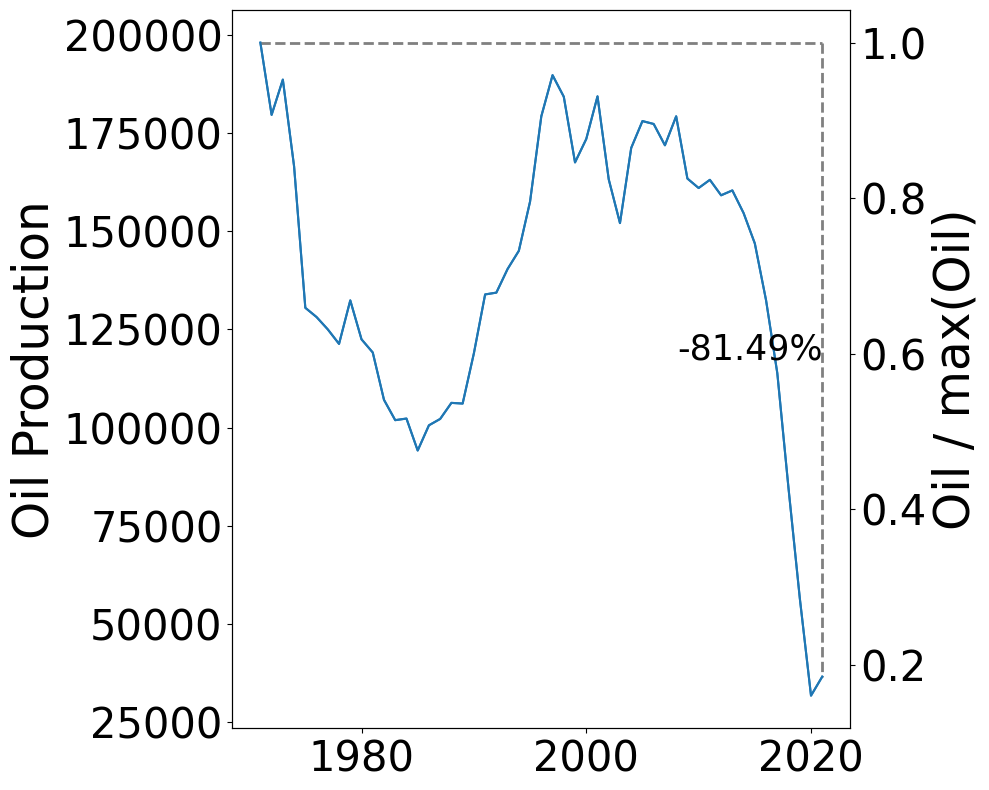

In [6]:
fig, ax = plt.subplots(1, figsize=(10, 8), sharex=True)

ax.plot(
    oil.loc[oil["LOCATION"] == "VEN"]["TIME"].astype(int),
    oil.loc[oil["LOCATION"] == "VEN"]["Value"],
)

ax.set_ylabel("Oil Production", fontsize=35)
ax.tick_params(labelsize=30)

ax.plot(
    [1971, oil.loc[oil["LOCATION"] == "VEN"]["TIME"].astype(int).max()],
    [
        oil.loc[oil["LOCATION"] == "VEN"]["Value"].max(),
        oil.loc[oil["LOCATION"] == "VEN"]["Value"].max(),
    ],
    lw=2,
    ls="--",
    color="grey",
)

ax.plot(
    [
        oil.loc[oil["LOCATION"] == "VEN"]["TIME"].astype(int).max(),
        oil.loc[oil["LOCATION"] == "VEN"]["TIME"].astype(int).max(),
    ],
    [
        oil.loc[oil["LOCATION"] == "VEN"]["Value"].max(),
        oil.loc[oil["LOCATION"] == "VEN"]["Value"].iloc[-1],
    ],
    lw=2,
    ls="--",
    color="grey",
)

ax2 = ax.twinx()
ax2.plot(
    oil.loc[oil["LOCATION"] == "VEN"]["TIME"].astype(int),
    oil.loc[oil["LOCATION"] == "VEN"]["Value"]
    / oil.loc[oil["LOCATION"] == "VEN"]["Value"].max(),
)

d = (
    1
    - (
        oil.loc[oil["LOCATION"] == "VEN"]["Value"]
        / oil.loc[oil["LOCATION"] == "VEN"]["Value"].max()
    ).iloc[-1]
)
ax2.annotate(
    f"-{d * 100:.2f}%",
    xy=[oil.loc[oil["LOCATION"] == "VEN"]["TIME"].astype(int).max(), (1 + (1 - d)) / 2],
    ha="right",
    fontsize=25,
)

ax2.set_ylabel("Oil / max(Oil)", fontsize=35)
ax2.tick_params(labelsize=30)

fig.subplots_adjust(hspace=0)
fig.tight_layout()

fig.savefig("figures/01-a-econ_oil.pdf")

The first graph shows the collapsing oil production. While not achieving the production peaks of the 1970s, Venezuela’s production approached its maximum historical levels in the early 2000s. Starting around 2013, however, production plummeted by 77%! 

## GDP per capita, Inflation rate, Population (IMF)

Data retrieved from IMF's datamapper API: https://www.imf.org/external/datamapper

In [7]:
def get_venezuela_population():
    """
    Retrieve total population of Venezuela (LP), from World Economic Outlook (April 2024), in millions of people unit.
    """

    r = requests.get("https://www.imf.org/external/datamapper/api/v1/LP/VEN")

    return pd.DataFrame(
        r.json()["values"]["LP"]["VEN"].items(), columns=["year", "values"]
    )

In [8]:
def get_venezuela_inflation():
    """
    Retrieve inflation rate, average consumer prices, of Venezuela (PCPIPCH).
    The average consumer price index (CPI) is a measure of a country's average level of prices based on the cost of a typical basket of consumer goods and services in a given period. The rate of inflation is the percent change in the average CPI.
    World Economic Outlook (April 2024), in annual percent change unit
    """

    r = requests.get("https://www.imf.org/external/datamapper/api/v1/PCPIPCH/VEN")

    return pd.DataFrame(
        r.json()["values"]["PCPIPCH"]["VEN"].items(), columns=["year", "values"]
    )

In [9]:
def get_venezuela_gdp_per_capita():
    """
    Retrieve GDP per capita, current prices, of Venezuela (NGDPDPC).
    Gross domestic product is the most commonly used single measure of a country's overall economic activity. It represents the total value at current prices of final goods and services produced within a country during a specified time period divided by the average population for the same one year.
    World Economic Outlook (April 2024), in U.S. dollars per capita unit.
    """

    r = requests.get("https://www.imf.org/external/datamapper/api/v1/NGDPDPC/VEN")

    return pd.DataFrame(
        r.json()["values"]["NGDPDPC"]["VEN"].items(), columns=["year", "values"]
    )

In [10]:
def get_venezuela_gdp_growth_rate():
    """
    Retrieve real GDP growth of Venezuela (NGDP_RPCH).
    Gross domestic product is the most commonly used single measure of a country's overall economic activity. It represents the total value at constant prices of final goods and services produced within a country during a specified time period, such as one year.
    World Economic Outlook (April 2024), in annual percent change unit.
    """

    r = requests.get("https://www.imf.org/external/datamapper/api/v1/NGDP_RPCH/VEN")

    return pd.DataFrame(
        r.json()["values"]["NGDP_RPCH"]["VEN"].items(), columns=["year", "values"]
    )

In [11]:
population = get_venezuela_population()
inflation = get_venezuela_inflation()
gdp_per_capita = get_venezuela_gdp_per_capita()
gdp_growth_rate = get_venezuela_gdp_growth_rate()

### GDP per capita

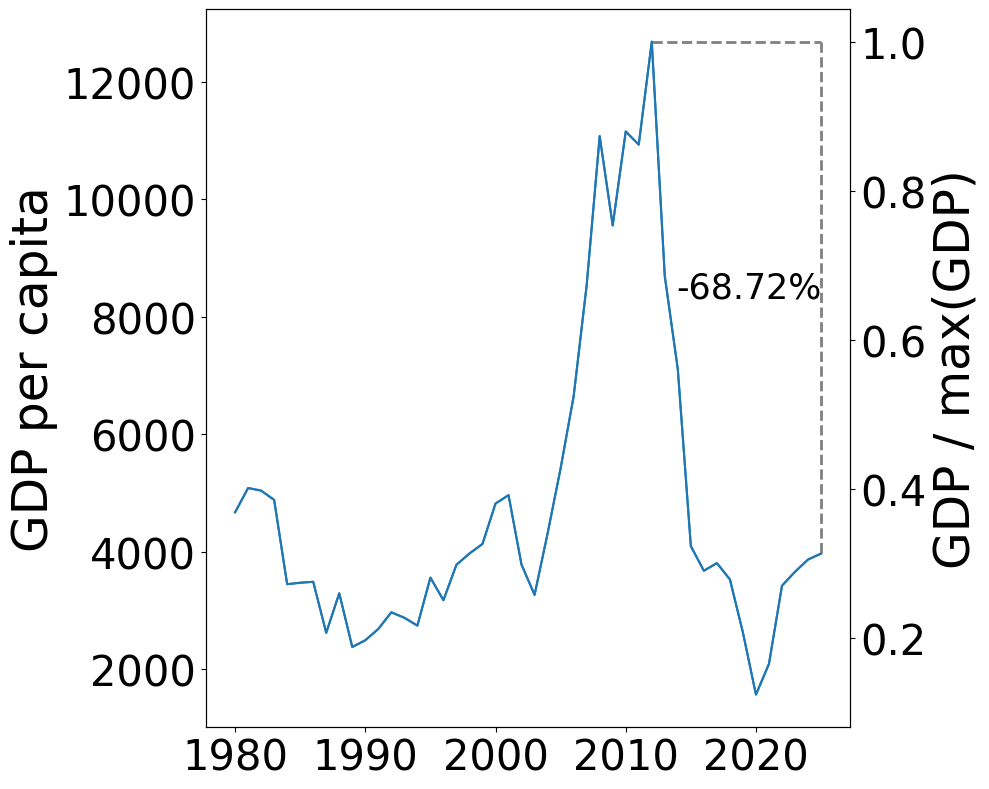

In [12]:
fig, ax = plt.subplots(1, figsize=(10, 8), sharex=True)


ax.plot(
    gdp_per_capita["year"].astype(int),
    gdp_per_capita["values"],
)

ax.set_ylabel("GDP per capita", fontsize=35)
ax.tick_params(labelsize=30)

ax.plot(
    [2012, gdp_per_capita["year"].astype(int).max()],
    [gdp_per_capita["values"].max(), gdp_per_capita["values"].max()],
    lw=2,
    ls="--",
    color="grey",
)

ax.plot(
    [
        gdp_per_capita["year"].astype(int).max(),
        gdp_per_capita["year"].astype(int).max(),
    ],
    [gdp_per_capita["values"].max(), gdp_per_capita["values"].iloc[-1]],
    lw=2,
    ls="--",
    color="grey",
)

ax2 = ax.twinx()
ax2.plot(
    gdp_per_capita["year"].astype(int),
    gdp_per_capita["values"] / gdp_per_capita["values"].max(),
)

d = 1 - (gdp_per_capita["values"] / gdp_per_capita["values"].max()).iloc[-1]
ax2.annotate(
    f"-{d * 100:.2f}%",
    xy=[gdp_per_capita["year"].astype(int).max(), (1 + (1 - d)) / 2],
    ha="right",
    fontsize=25,
)

ax2.set_ylabel("GDP / max(GDP)", fontsize=35)
ax2.tick_params(labelsize=30)

fig.subplots_adjust(hspace=0)
fig.tight_layout()
fig.savefig("figures/01-b-econ_gdppcppp.pdf")

### Population

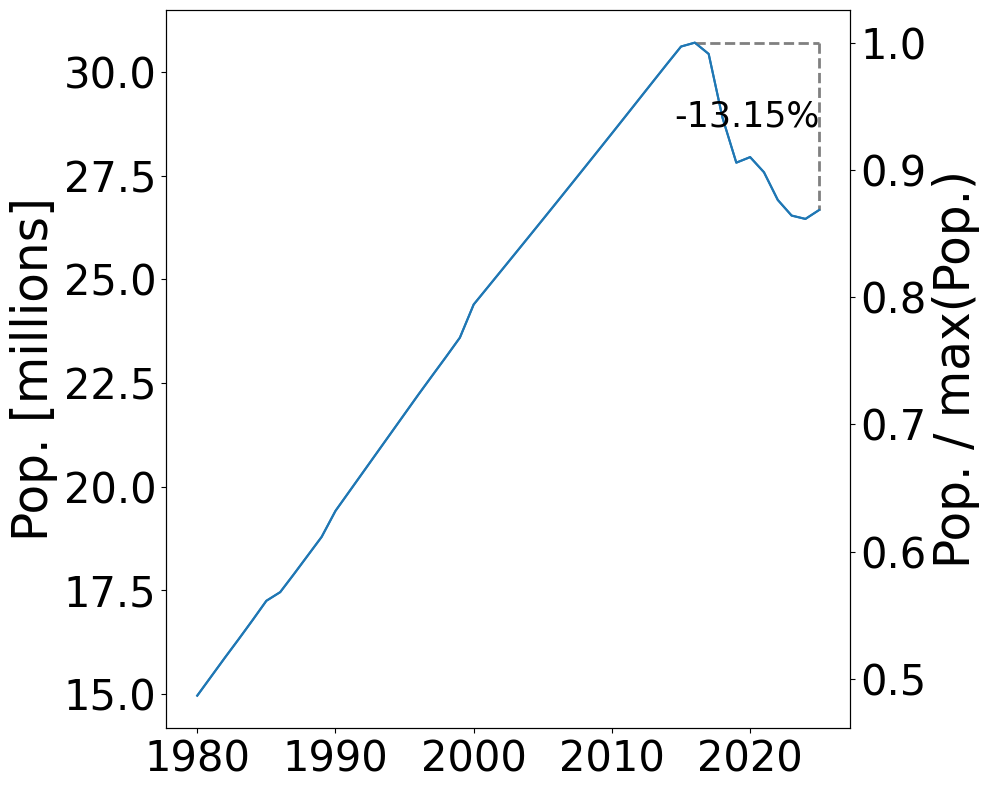

In [13]:
fig, ax = plt.subplots(1, figsize=(10, 8), sharex=True)

ax.plot(
    population["year"].astype(int),
    population["values"],
)

ax.set_ylabel("Pop. [millions]", fontsize=35)
ax.tick_params(labelsize=30)

ax.plot(
    [2016, population["year"].astype(int).max()],
    [population["values"].max(), population["values"].max()],
    lw=2,
    ls="--",
    color="grey",
)

ax.plot(
    [population["year"].astype(int).max(), population["year"].astype(int).max()],
    [population["values"].max(), population["values"].iloc[-1]],
    lw=2,
    ls="--",
    color="grey",
)

ax2 = ax.twinx()
ax2.plot(
    population["year"].astype(int),
    population["values"] / population["values"].max(),
)

d = 1 - (population["values"] / population["values"].max()).iloc[-1]
ax2.annotate(
    f"-{d * 100:.2f}%",
    xy=[population["year"].astype(int).max(), (1 + (1 - d)) / 2],
    ha="right",
    fontsize=25,
)
ax2.set_ylabel("Pop. / max(Pop.)", fontsize=35)
ax2.tick_params(labelsize=30)

fig.subplots_adjust(hspace=0)
fig.tight_layout()

fig.savefig("figures/01-d-econ_population.pdf")

In [14]:
population["values"].max() - population["values"].iloc[-2]

4.254999999999999

### Inflation Rate

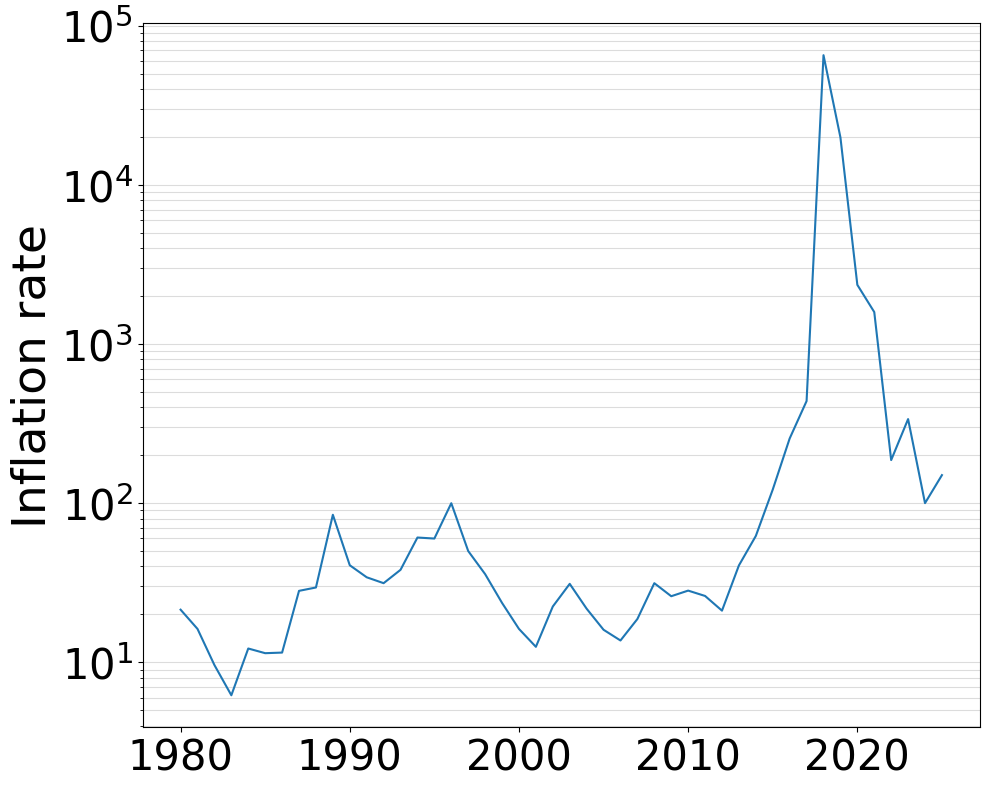

In [15]:
fig, ax = plt.subplots(1, figsize=(10, 8), sharex=True)

ax.yaxis.grid(True, linestyle="-", color="#bababa", alpha=0.5, which="both")

ax.plot(
    inflation["year"].astype(int),
    inflation["values"],
)

ax.set_ylabel("Inflation rate", fontsize=34)
ax.tick_params(labelsize=30)
ax.set_yscale("log")

fig.subplots_adjust(hspace=0)
fig.tight_layout()

fig.savefig("figures/01-c-econ_inflation.pdf")

The consequences of this collapse in a petrostate are stark – a staggering ≈70% drop in GDP per capita in only 7 years, which is followed by a surge in inflation that peaked at 32,000%. The crisis has caused a mass exodus of ≈ 4.25 million people, about 15% of the population, since 2013, one of the largest displacements in a non-war zone context.